**QUESTION 4** - Sorting Algorithm

In [1]:
def alg1(data):
    data = list(data)
    changes = True
    
    while changes:
        changes = False        
        for i in range(len(data) - 1):            
              if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data



def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        
        # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                  # nothing remains on the left; add the right + return
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                  # nothing remains on the right; add the left + return
                    return result + [left_top] + list(left)

**By trying a few tests, hypothesize what operation these functions perform on the list of values. (Include your tests in your readme file. (3 points)**

In [2]:
alg1([12,-56,78,98,12023])

[-56, 12, 78, 98, 12023]

In [3]:
alg1([12,-56.78 ,78.23, 9348, 12023])

[-56.78, 12, 78.23, 9348, 12023]

In [4]:
alg2([43.78,76,29,70,12])

[12, 29, 43.78, 70, 76]

In [5]:
alg2([12,-56.78 ,78.23, 9348, 12023])

[-56.78, 12, 78.23, 9348, 12023]

Hypothesis: Both these functions sort a list of input numbers into ascending order.

**Explain in your own words how (at a high level... don't go line by line, but provide an intuitive explanation) each of these functions is able to complete the task. (2 points each; 4 points total)**

Algorithm 1:  
The algorithm moves through the list starting from the first element.  
If the next element is smaller than the current element, it exchanges the element.  
It continues to the end of the element with this checking and swapping operation. This is one iteration.  
It then restarts the process and completes all iterations needed to sort the list.  
  
Algorithm 2:  
This algorithm divides the list into smaller sublists until there are only two elements in the left most sublist.  
It then sorts these two elements in the sublist. It will then breakdown and sort the sublist to the right of this.  
The algorithm sorts and merges the two sorted sublists together.  
This is done for all sublists of all sizes sequentially until the entire list has been broken down, sorted and remerged.

**Time the performance (use time.perf_counter) of alg1 and alg2 for various sizes of data n where the data comes from the function below, plot on a log-log graph as a function of n, and describe the apparent big-O scaling of each. (4 points)**

**Repeat the above for data2 and data3 (4 + 4 = 8 points each)**

In [4]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import numpy as np
import math

def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))

In [5]:
n_log = np.logspace(4, 10, num = 100, base = math.e, dtype = int)

In [7]:

timer1_1 = []
timer2_1 = []

for i in n_log:
    data_in = data1(i)
    
    t_start1 = time.perf_counter()
    alg1(data_in)
    t_end1 = time.perf_counter()
    
    timer1_1.append(t_end1 - t_start1)
    
    t_start2 = time.perf_counter()
    alg2(data_in)
    t_end2 = time.perf_counter()
    
    timer2_1.append(t_end2 - t_start2)

    
timer1_1_log = np.log(timer1_1)
timer2_1_log = np.log(timer2_1)


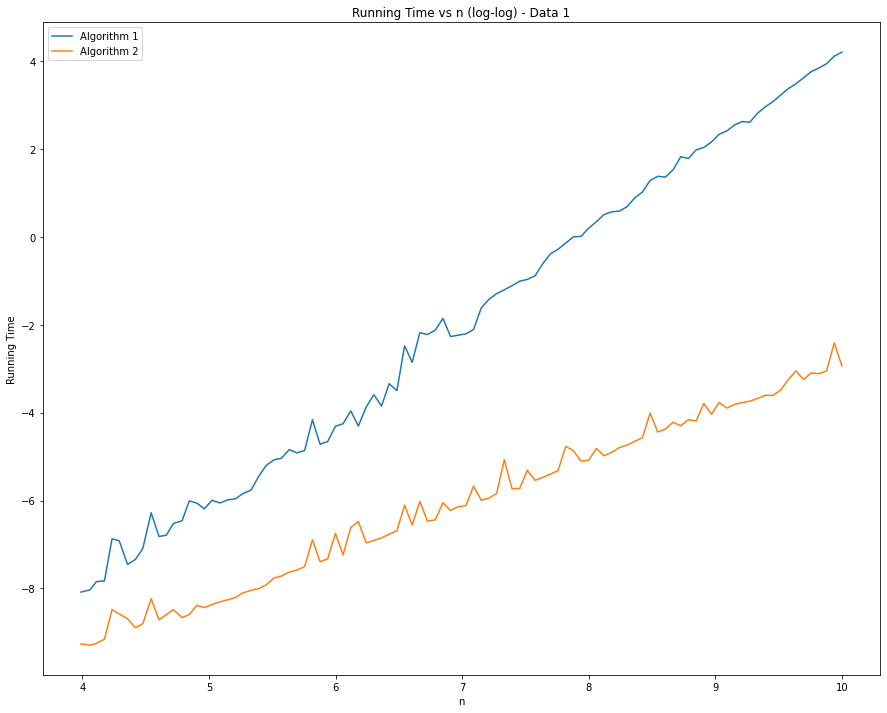

In [20]:
plt.figure(figsize=(15, 12))

plt.plot(np.log(n_log), timer1_1_log, label = "Algorithm 1")
plt.plot(np.log(n_log), timer2_1_log, label = "Algorithm 2")

plt.title('Running Time vs n (log-log) - Data 1')
plt.xlabel('n')
plt.ylabel('Running Time')
plt.legend()
plt.show()

In [9]:
timer1_2 = []
timer2_2 = []

for i in n_log:
    data_in = data2(i)
    
    t_start1 = time.perf_counter()
    alg1(data_in)
    t_end1 = time.perf_counter()
    
    timer1_2.append(t_end1 - t_start1)
    
    t_start2 = time.perf_counter()
    alg2(data_in)
    t_end2 = time.perf_counter()
    
    timer2_2.append(t_end2 - t_start2)

    
timer1_2_log = np.log(timer1_2)
timer2_2_log = np.log(timer2_2)

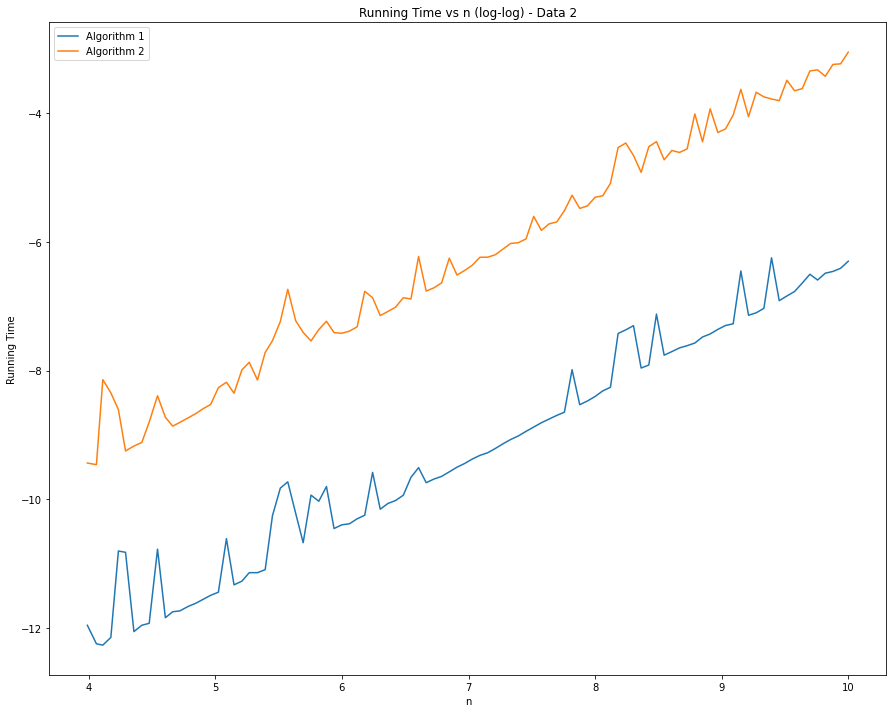

In [21]:
plt.figure(figsize=(15, 12))

plt.plot(np.log(n_log), timer1_2_log, label = "Algorithm 1")
plt.plot(np.log(n_log), timer2_2_log, label = "Algorithm 2")

plt.title('Running Time vs n (log-log) - Data 2')
plt.xlabel('n')
plt.ylabel('Running Time')
plt.legend()
plt.show()

In [12]:
timer1_3 = []
timer2_3 = []

for i in n_log:
    data_in = data3(i)
    
    t_start1 = time.perf_counter()
    alg1(data_in)
    t_end1 = time.perf_counter()
    
    timer1_3.append(t_end1 - t_start1)
    
    t_start2 = time.perf_counter()
    alg2(data_in)
    t_end2 = time.perf_counter()
    
    timer2_3.append(t_end2 - t_start2)

    
timer1_3_log = np.log(timer1_3)
timer2_3_log = np.log(timer2_3)


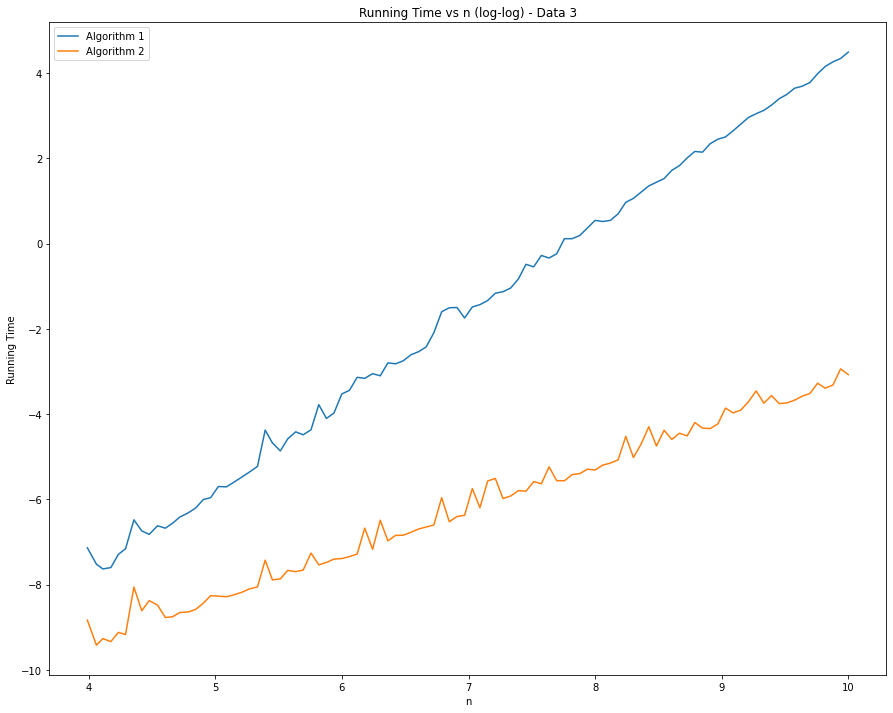

In [22]:
plt.figure(figsize=(15, 12))

plt.plot(np.log(n_log), timer1_3_log, label = "Algorithm 1")
plt.plot(np.log(n_log), timer2_3_log, label = "Algorithm 2")

plt.title('Running Time vs n (log-log) - Data 3')
plt.xlabel('n')
plt.ylabel('Running Time')
plt.legend()
plt.show()

The algorithms should follow O(n^2) for algorithm 1 and O(nlogn) for algorithm 2.  
This would be more apparent in the graphs if larger values of n were used.  
Algorithm 1 would perform similar to Algorithm 2 with smaller datasets.  
Algorithm 2 is much faster for larger datasets.

**Discuss how the scaling performance compares across the three data sets. (2 points)**

Data 2 returns sorted data.  
Hence, algorithm 1 is faster here since it does only one iteration and then returns the list whereas algorithm 2 has to setup, break down, sort and then return.    
  
All the other datasets are unsorted.  
Hence, algorithm 2 performs better on them due to better time complexity. 

**Which algorithm would you recommend to use for arbitrary data and why? (2 points)**

I would use algorithm 2 for arbitrary data. It will perform faster in general on any type of data.  
Algorithm 1 would work fine with small data.  However, it's performance will quickly drop (runtime increase quickly) with increasing data size.  
Algorithm 2 will work consistently for all dataset sizes.

**Explain in words how to parallelize alg2; that is, where are there independent tasks whose results can be combined? (2 points)**

Algorithm 2 performs 3 main tasks: breaking down sublists, sorting sublists and merging sublists.

Breaking down into sublists and then sorting each smaller sublist can be done parallely.  
Merging the sublists into larger sublists cannot be done until the smaller sublists are sorted so it cannot be done parallely.  
This can be repeated for every level of breakdown and rebuilding of sublists.

**Using the multiprocessing module, provide a two-process parallel implementation of alg2 (4 points), compare its performance on data from the data1 function for moderate n (3 points), and discuss your findings (3 points).**

The following code was not run on Jupyter notebook but the code and results are attached here for convenience.  
It was run via command line in a .py file.

In [ ]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing 
import math 


def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split])) # left data
        right = iter(alg2(data[split:])) # right data
        result = []
    # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
    # combining the left and right data
    while True:
        if left_top < right_top:
            result.append(left_top)
            try:
                left_top = next(left)
            except StopIteration:
            # nothing remains on the left; add the right + return
                return result + [right_top] + list(right)
        else:
            result.append(right_top)
            try:
                right_top = next(right)
            except StopIteration:
        # nothing remains on the right; add the left + return
                return result + [left_top] + list(left)
                
                
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result


def alg2_parallel(data):
    if len(data) <= 1:
        return data
        
    else:
        split = len(data) // 2
        with multiprocessing.Pool() as m:   
            [left, right] = m.map(alg2, [data[:split], data[split:]])
            
        left = iter(left)
        right = iter(right)
        # combining the left and right data
        result = []
        left_top = next(left)
        right_top = next(right)
        
    while True:
        if left_top < right_top:
            result.append(left_top)
            try:
                left_top = next(left)
            except StopIteration:
            # nothing remains on the left; add the right + return
                return result + [right_top] + list(right)
        else:
            result.append(right_top)
            try:
                right_top = next(right)
            except StopIteration:
        # nothing remains on the right; add the left + return
                return result + [left_top] + list(left)



if __name__ == '__main__':

    #n = 20_000
    n = 2**23    
    data_in = data1(n)

    t_start_1 = time.perf_counter()
    alg2_parallel(data_in)     
    t_end_1 = time.perf_counter()

    time_parallel= t_end_1 - t_start_1


    t_start_2 = time.perf_counter()
    alg2(data_in)    
    t_end_2 = time.perf_counter()     

    time_alg2 = t_end_2 - t_start_2


    print(time_parallel,  time_alg2)


Output for n = 20_000:      1.4426058999961242 and 0.0757389000209514  
Output for n = 2^23:      29.96704730001511 and 52.81814590000431 

The benefits of parallelization are apparent at higher values.  
owever, for smaller and moderate values of n, the time for alg2 was lesser than the parallelization. This is because of the time needed to setup the multiprocessing.